# Importing the library

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Splitting the dataset

In [12]:
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df, drop_first=True)
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Model training

In [6]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [7]:
y_pred = model.predict(X_test)

#Evaluation

In [8]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.8665804146743344
MAE: 2098.3089512195124
RMSE: 3245.4088386064104


#Hyperparameter Tuning

In [9]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth": [3, 5, 7, 10, None],
          "min_samples_split": [2, 5, 10],
          "min_samples_leaf": [1, 2, 4]}

grid = GridSearchCV(DecisionTreeRegressor(random_state=42),
                    param_grid=params, cv=5, scoring="r2")
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_model = grid.best_estimator_

Best params: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}


# Evaluation with tuned model

In [13]:
y_pred_best = best_model.predict(X_test)

print("Tuned R² Score:", r2_score(y_test, y_pred_best))
print("Tuned MAE:", mean_absolute_error(y_test, y_pred_best))
print("Tuned RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))

Tuned R² Score: 0.9131459592417749
Tuned MAE: 1651.7245856846805
Tuned RMSE: 2618.512403464984


/tmp/ipython-input-2719774679.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


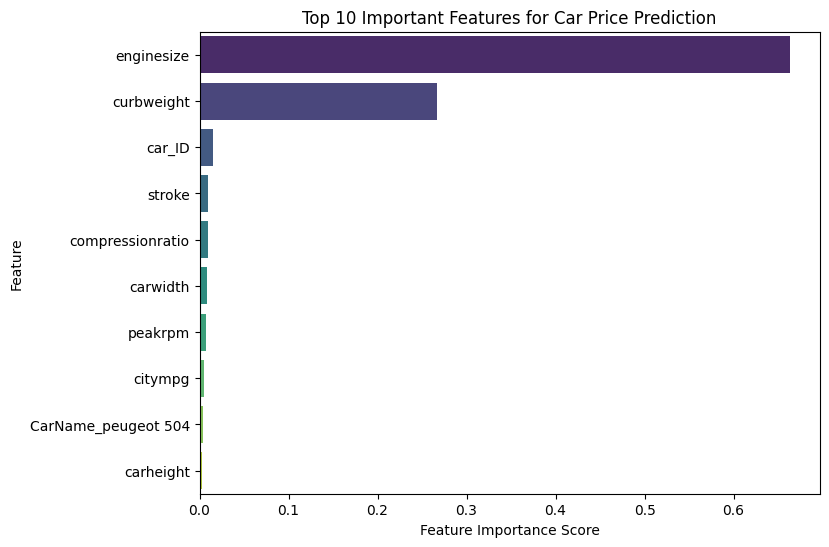

In [14]:
plt.figure(figsize=(8,6))
feat_importance = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = feat_importance.nlargest(10)

sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Important Features for Car Price Prediction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

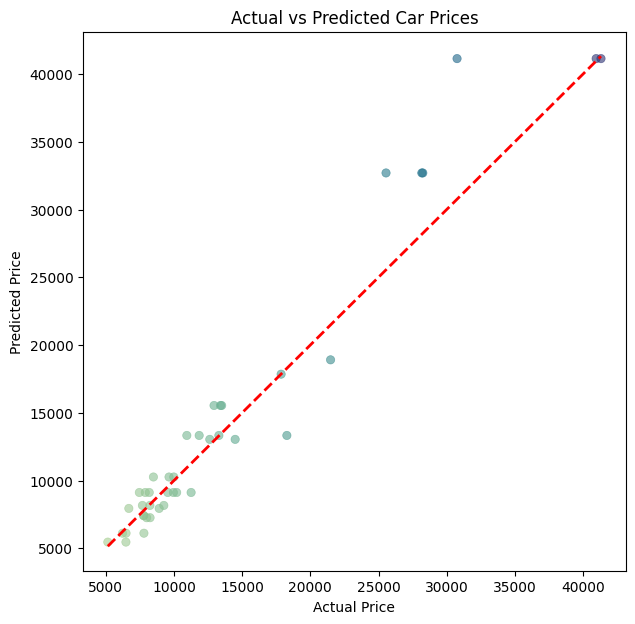

In [15]:
y_pred = best_model.predict(X_test)

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None, palette="crest", hue=y_test)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2, linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend([],[], frameon=False)
plt.show()

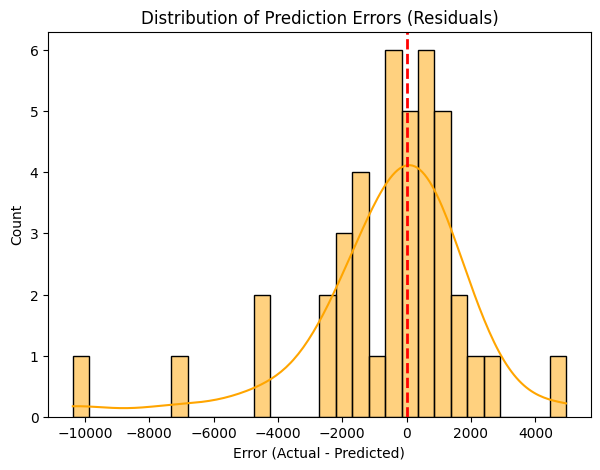

In [16]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, color="orange", bins=30)
plt.axvline(0, color='red', linestyle='--', lw=2)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error (Actual - Predicted)")
plt.show()

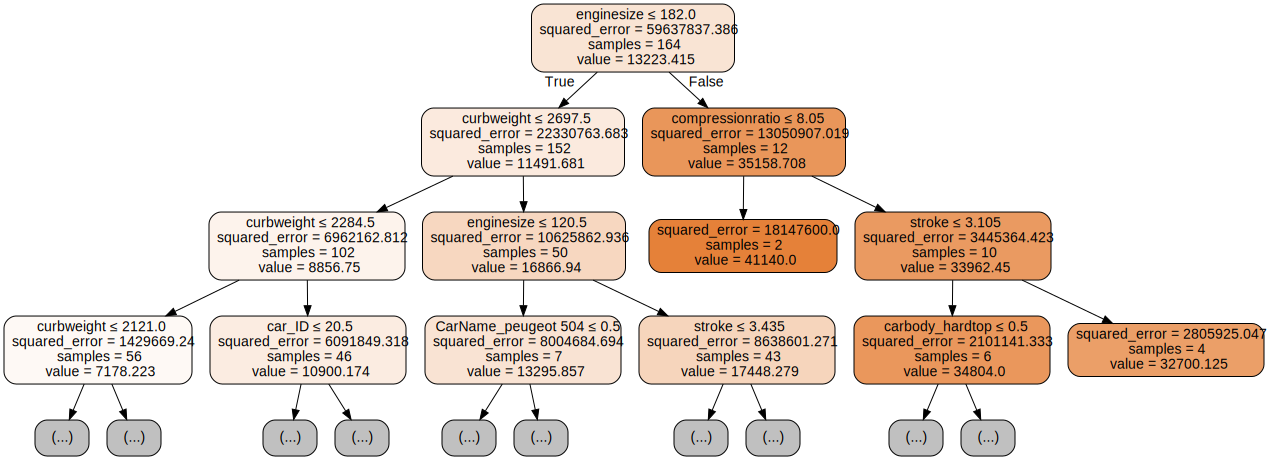

In [19]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(best_model,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           max_depth=3,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph